In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1

In [3]:
def signal(x):
    return np.sin(2*np.pi*x)

In [4]:
@np.vectorize
def w_h(n, N):
    if 0<=n<=N:
        return 0.54 - 0.46*np.cos(2*np.pi*n/N)
    return 0

In [5]:
@np.vectorize
def w_r(n, N):
    if 0<=n<=N:
        return 1
    return 0

In [6]:
x = np.arange(0,10,1e-2)
N = 5
L = 1024

In [7]:
y = signal(x)
y /= np.linalg.norm(y, ord=1)

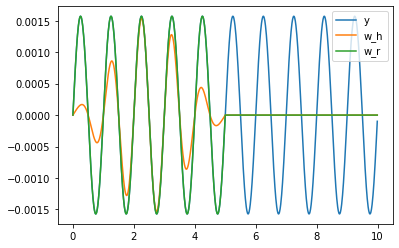

In [8]:
plt.plot(x, y, label='y')
plt.plot(x, y*w_h(x, N), label='w_h')
plt.plot(x, y*w_r(x, N), label='w_r')
plt.legend()

In [9]:
plt.rcParams.update({"font.size":14})

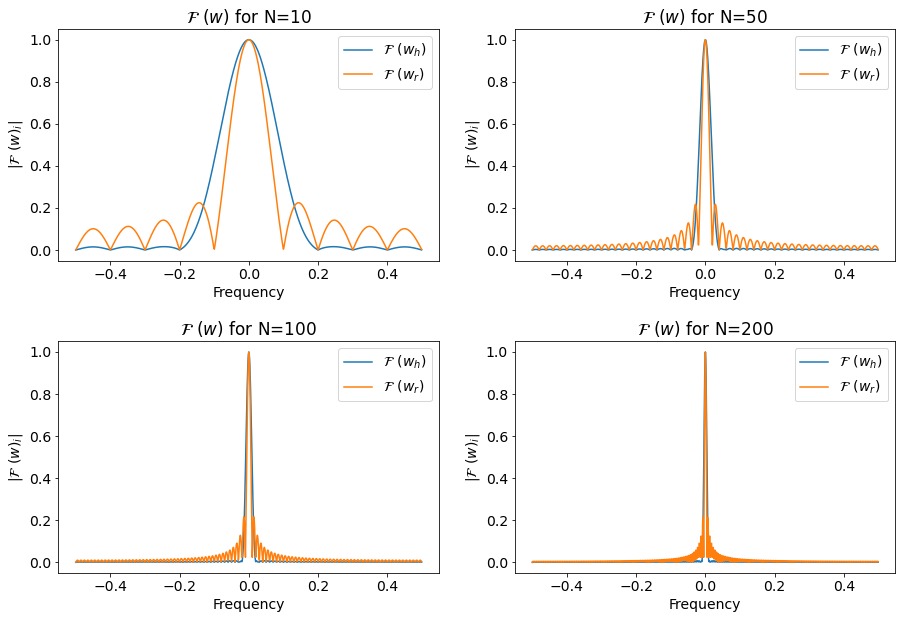

In [10]:
plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
for i, N in enumerate([10, 50, 100, 200]):
    plt.subplot(2,2,i+1)
    filt = w_r(np.arange(N), N)*1.
    filt /= np.linalg.norm(filt, ord=1)
    w_r_hat = np.fft.fft(filt, n=L)
    w_r_hat = np.fft.fftshift(w_r_hat)
    
    filt = w_h(np.arange(N), N)*1.
    filt /= np.linalg.norm(filt, ord=1)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = np.fft.fftshift(w_h_hat)
    
    plt.plot(np.array(range(-L//2,L//2))/L, np.abs(w_h_hat), label=r'$\mathcal{F}\ (w_h)$')
    plt.plot(np.array(range(-L//2,L//2))/L, np.abs(w_r_hat), label=r'$\mathcal{F}\ (w_r)$')
    plt.legend()
    plt.title(r'$\mathcal{F}\ (w)$ for N='+str(N))
    plt.xlabel('Frequency')
    plt.ylabel(r'|$\mathcal{F}\ (w)_i|$')
plt.savefig('delta_approx', bbox_inches='tight')

In [10]:
def swap(x):
    x = list(x)
    x = x[len(x)//2:] + x[:len(x)//2]
    x = np.array(x)
    return x

In [11]:
def h(n, f_0):
    return np.sin(2*np.pi*(n-0.5)*f_0) / (np.pi*(n-0.5))

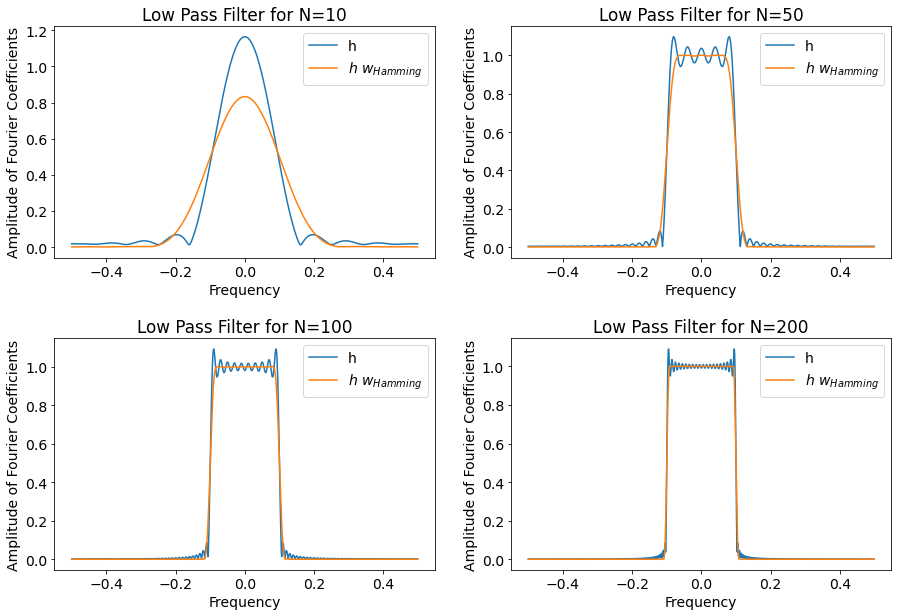

In [12]:
plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
for i, N in enumerate([10, 50, 100, 200]):
    plt.subplot(2,2,i+1)
    x = np.arange(-N//2,N//2+1)
    l = np.array(range(-L//2,L//2))/L
    
    filt = h(x, 0.1)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label='h')
    
    filt = h(x, 0.1)*w_h(x+N//2, N)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label=r'$h\ w_{Hamming}$')
    
    plt.legend()
    plt.title(r'Low Pass Filter for N='+str(N))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude of Fourier Coefficients')
plt.savefig('low_pass', bbox_inches='tight')

In [13]:
f0 = 1/8.
f1 = 1/4

In [14]:
def h_even(n, f_0, N):
    return np.sin(2*np.pi*(n-0.5)*f_0) / (np.pi*(n-0.5))

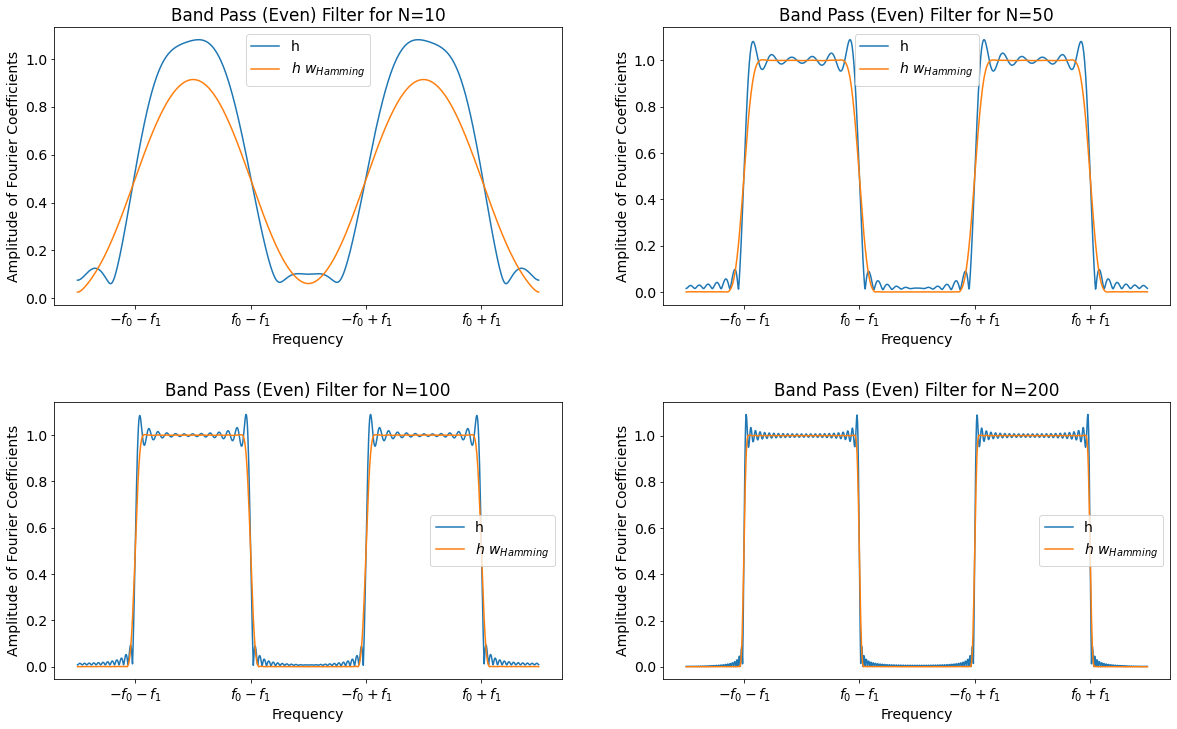

In [15]:
plt.subplots(2,2,figsize=(20,12))
plt.subplots_adjust(hspace=0.35)
for i, N in enumerate([10, 50, 100, 200]):
    plt.subplot(2,2,i+1)
    x = np.arange(-N//2,N//2+1)
    l = np.array(range(-L//2,L//2))/L
    
    filt = h_even(x, f1+f0, N) - h_even(x, f0, N)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label='h')

    filt = (h_even(x, f1+f0, N) - h_even(x, f0, N))*w_h(x+N//2, N)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label=r'$h\ w_{Hamming}$')

    plt.xticks([-f0-f1, f0-f1, -f0+f1, f0+f1], [r'$-f_0-f_1$', r'$f_0-f_1$', r'$-f_0+f_1$', r'$f_0+f_1$'])
    plt.legend()
    plt.title(r'Band Pass (Even) Filter for N='+str(N))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude of Fourier Coefficients')
plt.savefig('band_pass_even', bbox_inches='tight')

In [16]:
@np.vectorize
def h_odd(n, f0):
    if n==0:
        return 2*f0
    return np.sin(2*np.pi*n*f0) / (np.pi*n)

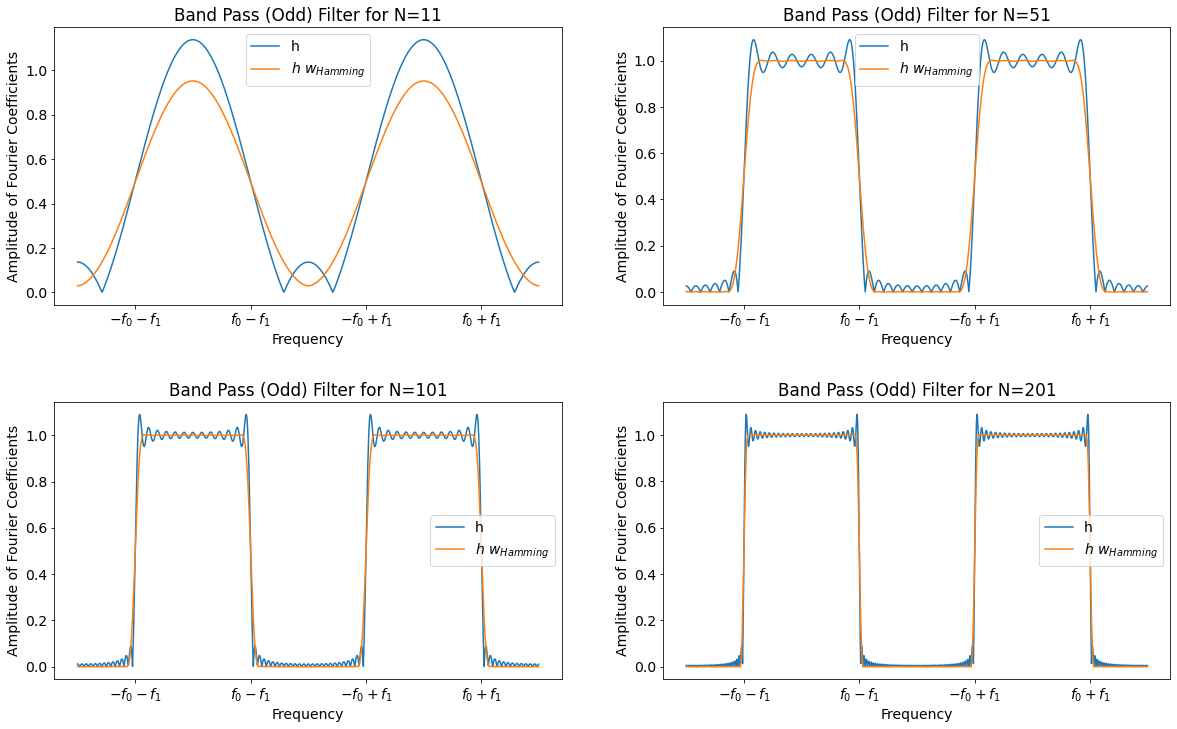

In [17]:
plt.subplots(2,2,figsize=(20,12))
plt.subplots_adjust(hspace=0.35)
for i, N in enumerate([11, 51, 101, 201]):
    plt.subplot(2,2,i+1)
    x = np.arange(-(N-1)//2,(N-1)//2+1)
    l = np.array(range(-L//2,L//2))/L
    
    filt = h_odd(x, f1+f0) - h_odd(x, f0)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label='h')

    filt = (h_odd(x, f1+f0) - h_odd(x, f0))*w_h(x+N//2, N)
    w_h_hat = np.fft.fft(filt, n=L)
    w_h_hat = swap(w_h_hat)
    plt.plot(l, np.abs(w_h_hat), label=r'$h\ w_{Hamming}$')

    plt.xticks([-f0-f1, f0-f1, -f0+f1, f0+f1], [r'$-f_0-f_1$', r'$f_0-f_1$', r'$-f_0+f_1$', r'$f_0+f_1$'])
    plt.legend()
    plt.title(r'Band Pass (Odd) Filter for N='+str(N))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude of Fourier Coefficients')
plt.savefig('band_pass_odd', bbox_inches='tight')